In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\arul\OneDrive\Desktop\Arul_project_files\NLP(RNN_sentimental_analysis)\nlp(sentimental_Analysis)_project_dataset\Instagram.csv')
df.head()

,reviewId,content,score
0,b1062591-75ef-496e-ab19-1e7c5de14f24,app is ok but i cant apdate my Instagram 😭,5
1,d80aaa40-09e2-4279-9d7b-093bb9b5f3f7,🔥 I feel CRAZY 💖,5
2,de006fd5-7d77-428e-8459-6ffc2d45ac48,let Android users edit comments NOW! it's almo...,5
3,e19a47e5-cf46-4d4b-9f4e-60e2b9cfed8f,best short video generator app,5
4,5fe9fe5c-dd7a-43ef-a8ee-29c2b55122ef,the reels are hard to make and post. hate it,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [3]:
df.shape

(10000, 3)

In [4]:
df[['content','score']].isnull().sum()

content    0
score      0
dtype: int64

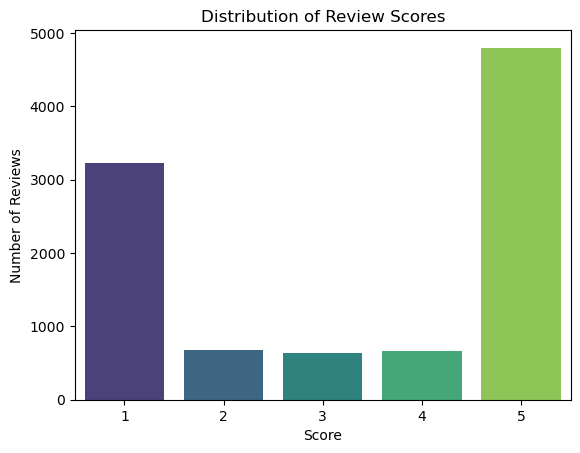

In [5]:
#eda 
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='score', data=df, palette='viridis')
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Number of Reviews")
plt.show()


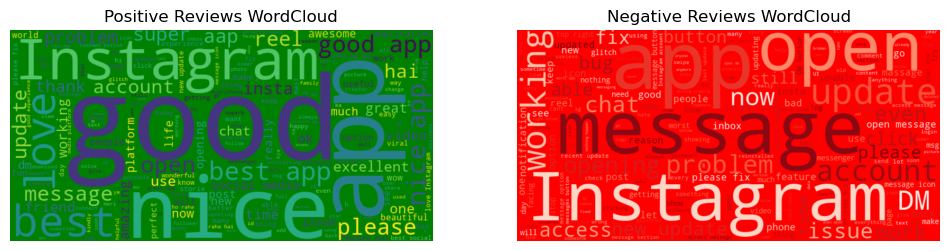

In [6]:
from wordcloud import WordCloud


positive_text = " ".join(df[df['score'] >= 4]['content'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='green').generate(positive_text)

# Negative reviews
negative_text = " ".join(df[df['score'] <= 2]['content'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='red', colormap='Reds').generate(negative_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")

plt.show()


In [7]:
import emoji
import re

def extract_emojis(text):
    emoji_list = [char for char in text if char in emoji.EMOJI_DATA]
    return ''.join(emoji_list)

df['emojis'] = df['content'].astype(str).apply(extract_emojis)


In [8]:
df['emojis'].value_counts()

emojis
          8039
👍          203
❤           64
😭           49
😊           42
          ... 
🙄😆😆          1
🙃🙃           1
🥰🥰🥰🥰🥰🥰       1
👌🫰🫶          1
😿            1
Name: count, Length: 774, dtype: int64

In [9]:
from collections import Counter

all_emojis = ''.join(df['emojis'])
emoji_counter = Counter(all_emojis)

print("Total unique emojis:", len(emoji_counter))
print("Most common emojis:", emoji_counter.most_common(20))

Total unique emojis: 322
Most common emojis: [('👍', 475), ('❤', 302), ('😭', 200), ('😊', 151), ('😍', 143), ('🙏', 133), ('🏻', 133), ('👌', 128), ('🥰', 127), ('😡', 105), ('💯', 94), ('♥', 73), ('🙂', 70), ('✨', 68), ('😁', 68), ('😘', 68), ('😔', 59), ('🔥', 53), ('🤬', 47), ('😞', 46)]


In [11]:
#Data Preprocessing Starts from here itself

In [10]:
#convert the emoji into text 
#do not remove the emoji why becoz the content meaning will be removed 
#so that we use "demojize" means(convert emoji into text(text representation of emoji)

import emoji
import re 

df['demoji_content']=df['content'].apply(lambda x : emoji.demojize(x,language="en"))
                                         

In [12]:
pd.set_option('display.max_colwidth',None)

In [13]:
df[['content','demoji_content']].head(2)

,content,demoji_content
0,app is ok but i cant apdate my Instagram 😭,app is ok but i cant apdate my Instagram :loudly_crying_face:
1,🔥 I feel CRAZY 💖,:fire: I feel CRAZY :sparkling_heart:


In [14]:
import spacy 
nlp=spacy.load("en_core_web_sm")

In [15]:
#nlp = it tokenizes the text (splits into words/punctuation), 
#assigns lemmata, detects stopwords, and marks punctuation, among other things.

#doc is the place where like a list of Token i.e text = "Cats are running.", doc contains tokens: ["Cats", "are", "running",]




def preprocess_text(text):
    text=text.replace(":", "")
    text=text.replace("_", " ")
    doc=nlp(text)
    tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct
        
    ]
    return " ".join(tokens)

In [16]:
df['cleaned_content']=df['demoji_content'].apply(preprocess_text)

In [17]:
df['cleaned_content'].head()

0                             app ok not apdate instagram loudly cry face
1                                           fire feel crazy sparkle heart
2    let android user edit comment 2026 you let fix typo face rolling eye
3                                          good short video generator app
4                                                     reel hard post hate
Name: cleaned_content, dtype: object

In [26]:
#remove neutral ratings 
#df['score'] != 3 → checks which scores are not 3,
# df[...] → keeps only those rows,
# df = ... → updates your DataFrame.

df = df[df['score'] != 3]

In [19]:
df['score'].value_counts()

score
5    4799
1    3226
2     672
4     670
Name: count, dtype: int64

In [20]:
df['cleaned_content'].shape

(9367,)

In [21]:
df = df[df['cleaned_content'].notna()]

In [23]:
df = df[df['cleaned_content'].str.strip() != ""]

In [24]:
df['cleaned_content'].shape

(9345,)

In [25]:
df['score'].shape

(9345,)

In [28]:
df['score'].value_counts()
#after spliting trainig data and testing data class imbalance will be handled 
#before if it is handled "data leakage will happend"

score
5    4784
1    3223
2     671
4     667
Name: count, dtype: int64

In [29]:
import numpy as np
np.percentile(df['cleaned_content'].apply(lambda x: len(x.split())), 90)

#max_len wiil be 15 but 20 is enough 
#to check the 90 percentile and put according to that 


14.0

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_content'])
print("Total unique words:", len(tokenizer.word_index))


#so we apply num_of_words = 8000

Total unique words: 7662


In [31]:
#convert the text into number for theat we use tokenizer and pad sequence 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define parameters
num_words = 8000   # since unique words ≈ 8018
max_len = 20       # based on percentile

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_content'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])

# Pad sequences
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

print("Shape of X:", X.shape)


Shape of X: (9345, 20)


In [32]:
def ratings(score):
    if score<=2:
        return "negative"
    elif score>=4:
        return "positive"
    else:
        return None

In [33]:
df['ratings']=df['score'].apply(ratings)

In [34]:
df['ratings'].value_counts()

ratings
positive    5451
negative    3894
Name: count, dtype: int64

In [35]:
df['ratings'].isnull().sum()

0

In [36]:
#Encode the target column 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['ratings'])

print(le.classes_)

['negative' 'positive']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y   # ensures both classes are balanced in train/test
)

print(X_train.shape, X_test.shape)


(7476, 20) (1869, 20)


In [38]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 3115, 1: 4361}


In [39]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: 1.2, 1: 0.8571428571428571}


In [40]:
import numpy as np
glove_path="C:\\Users\\arul\\lstm_sentimental_analysis_projects\\glove.6B.100d.txt"
embedding_index = {}
with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print(f"Total words in GloVe: {len(embedding_index)}")

Total words in GloVe: 400000


In [41]:
import os
print(os.path.exists(glove_path))

True


In [42]:
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    vector = embedding_index.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(vocab_size, embedding_dim, 
              weights=[embedding_matrix], 
              input_length=X.shape[1],
              trainable=False),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │         766,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 766,400 (2.92 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 766,400 (2.92 MB)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights
)


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6625 - loss: 0.5561 - val_accuracy: 0.8352 - val_loss: 0.4238
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8357 - loss: 0.4058 - val_accuracy: 0.8518 - val_loss: 0.3926
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8356 - loss: 0.3946 - val_accuracy: 0.8454 - val_loss: 0.4008
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8469 - loss: 0.3814 - val_accuracy: 0.8539 - val_loss: 0.3805
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8596 - loss: 0.3641 - val_accuracy: 0.8534 - val_loss: 0.3706
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8582 - loss: 0.3615 - val_accuracy: 0.8550 - val_loss: 0.3777
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8580 - loss: 0.3740 - val_accuracy: 0.8566 - val_loss: 0.3631
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8568 - loss: 0.3577 - val_accu

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       779
           1       0.89      0.86      0.88      1090

    accuracy                           0.86      1869
   macro avg       0.85      0.86      0.85      1869
weighted avg       0.86      0.86      0.86      1869



In [46]:
#Training Accuracy = 87%
#Validation Accuracy = 86%

In [47]:
#loss: 0.56 →  0.36
#val_loss: 0.42 → 0.36